<h2>Who wants a piece of Py?</h2>

<h1>WhoPy #002</h1>
<h2>More fun with the library</h2>

Na początek załadujemy kilka gotowych bibliotek python'a
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [1]:
import numpy as np  #to taka biblioteka z funkcjami numerycznymi jak tablice i inne takie tam      
import matplotlib.pyplot as plt #to biblioteka pozwalajaca nam wykreslać wykresy
from scipy.interpolate import spline
from scipy.interpolate import InterpolatedUnivariateSpline

teraz czas załadować naszą własną bibliotekę<br>
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [2]:
#importing our own library
from thermalModelLibrary import functionsLibrary as tml
from thermalModelLibrary import geometryLib as gml

In [3]:
time = np.arange(0, 10, 0.002) # Zdefiniujmy sobie wektor czasu
#Zdefiniujmy funkcję opisująca prąd w czasie
def Icw(czas, czasMax, iRMS):
    if czas <= czasMax:
        return iRMS
    else:
        return 0
    
#Zwektoryzujmy nasza funkcję opisująca prąd (zapiszmy jako wektor)
Icw_vector = np.vectorize(Icw)
current = Icw_vector(time,3,25e3)


masterResultsArray = []
masterIndex = 0
tempMaxArray = []
segmentsArray = []

for analiza in range(5,15,1):
    copperBarGeometry = np.array([\
                                  [40,10,10,0],\
                                  [40,10,15,14],\
                                  [40,10,15-analiza,0],\
                                  [40,10,200,0],\
                                  [40,10,15,14],\
                                  [40,10,10,0],\
                                  ])
    if masterIndex > 0:
        copperBarGeometry = gml.slicer(copperBarGeometry)
    
    print('Elementów szyny: '+str(len(copperBarGeometry)))
          
    masterResultsArray.append(tml.mainAnalysis(analysisName='Analiza ['+str(analiza)+']',\
                               geometryArray=copperBarGeometry,\
                               timeArray=time,\
                               currentArray=current,\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=25, barStartTemperature=25,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385))
    #tml.plotCurves(timeTable=time,\
    #           dataArray=masterResultsArray[masterIndex],\
    #           plotName='Symulacja'+str(analiza),xLabel='time [s]',yLabel='Temperature [degC]',\
    #           curvesLabelArray = False)
    
    
    tempMaxArray.append(np.amax(masterResultsArray[masterIndex]))
    segmentsArray.append(len(copperBarGeometry))
    
    masterIndex +=1
    







Elementów szyny: 6
Starting analysis: Analiza [5]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 27
Starting analysis: Analiza [6]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 30
Starting analysis: Analiza [7]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 35
Starting analysis: Analiza [8]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 40
Starting analysis: Analiza [9]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 51
Starting analysis: Analiza [10]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 61
Starting analysis: Analiza [11]
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Elementów szyny: 83
Starting analysis: Analiza [12]
Progress: |██████████████████████████

<p>a teraz nieco inna zabawa z geometrią. SubSegmentacja - taka wyszukana nazwa</p>
<p> Pamiętaj <b>Shift+ENTER</b>.</p>

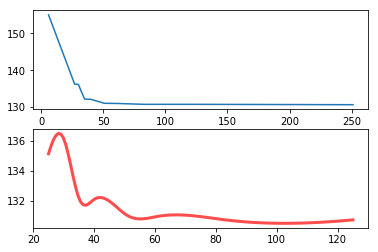

In [4]:
fig = plt.figure()
wykres0 = fig.add_subplot(2,1,1)
wykres0A = fig.add_subplot(2,1,2)

wykres0.plot(segmentsArray, tempMaxArray)

xnew = np.linspace(25,125,125) 
power_smooth = spline(segmentsArray,tempMaxArray,xnew)


spl = InterpolatedUnivariateSpline(segmentsArray,tempMaxArray)

wykres0A.plot(xnew, spl(xnew), 'r', lw=3, alpha=0.7)




plt.show()


<p> Warto zauważyć, że dokładniejsze odwzorowanie geometrii segmantami wpływa na wartość wyników. Mechanizm z którego to wynika jest dość oczywisty (chodzi o udział przewodnictwa pomiędzy segmentami w transporcie energii). Jednak na ile jest to zbliżanie się do rzeczywistości a na ile błąd?</p>
<p> daje do myśelenia choćiażby w odniesieniu do analiz FEM - bo to jest wprost analogia do wielkości elementów siatki.</p>

In [10]:
daneZanalizy = np.array(list(zip(segmentsArray,tempMaxArray)))

print(daneZanalizy)


[[   6.          155.04584392]
 [  27.          136.20956391]
 [  30.          136.12386747]
 [  35.          132.15045081]
 [  40.          132.08886034]
 [  51.          130.99950745]
 [  61.          130.95771244]
 [  83.          130.72257592]
 [ 125.          130.72134972]
 [ 251.          130.61905407]]



<h3>keep the science in your heart!</h3>
<p>Tomek</p>
<div style='background-color: #aaaaaa; font-style: italic;'>#sciencematters</div>